# matplotlib library................

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\Proxy1\\Desktop\\6682-COE\\GlobalLandTemperaturesByCity.csv")

In [303]:
print(data.head())

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


In [304]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [308]:
data.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False
2,False,True,True,False,False,False,False
3,False,True,True,False,False,False,False
4,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False
8599210,False,False,False,False,False,False,False


In [310]:
data.shape

(8599212, 7)

In [312]:
data = data.dropna()

In [314]:
data.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8599206,False,False,False,False,False,False,False
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False


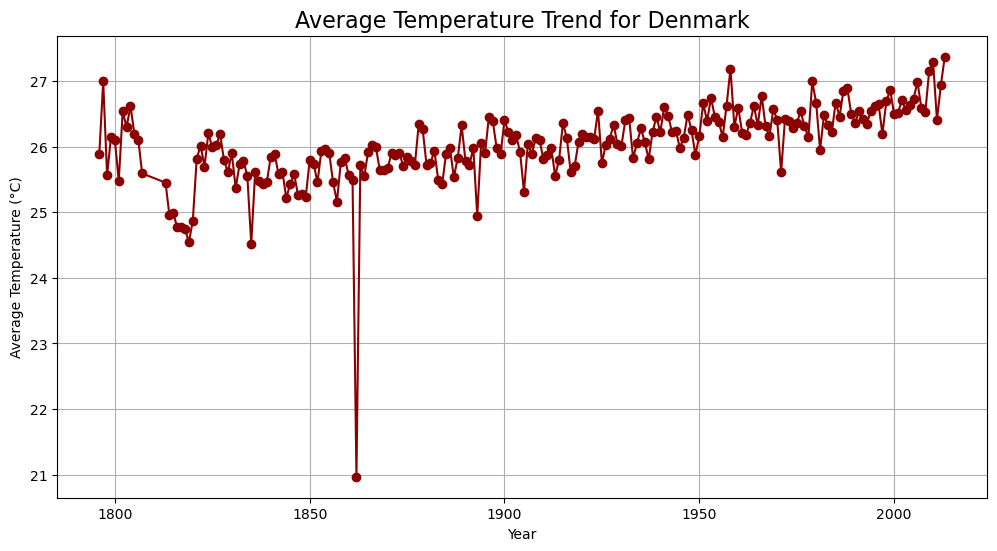

In [316]:
# Line Plot.........

city_data = data[data['City'] == 'Bangaon'].copy() 
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
city_data['year'] = city_data['dt'].dt.year
annual_avg_year = city_data.groupby('year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_year['year'], annual_avg_year['AverageTemperature'], linestyle='-', marker='o', color='darkred')
plt.title("Average Temperature Trend for Denmark", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

In [318]:
print(data.iloc[:,1:2])

         AverageTemperature
0                     6.068
5                     5.788
6                    10.644
7                    14.051
8                    16.082
...                     ...
8599206               7.710
8599207              11.464
8599208              15.043
8599209              18.775
8599210              18.025

[8235082 rows x 1 columns]


In [320]:
print(data['AverageTemperature'].unique())

[ 6.068  5.788 10.644 ...  9.202  6.875  6.66 ]


In [322]:
data.isnull()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8599206,False,False,False,False,False,False,False
8599207,False,False,False,False,False,False,False
8599208,False,False,False,False,False,False,False
8599209,False,False,False,False,False,False,False


In [324]:
values = data.groupby('Country')['AverageTemperature'].max().sort_values(ascending=False)
top_countries = values.head(12)
print(values)

Country
Algeria           39.651
Iran              39.156
Iraq              38.283
Saudi Arabia      38.049
Pakistan          37.938
                   ...  
United Kingdom    20.743
Mongolia          20.201
Ireland           18.740
Norway            18.048
Iceland           13.812
Name: AverageTemperature, Length: 159, dtype: float64


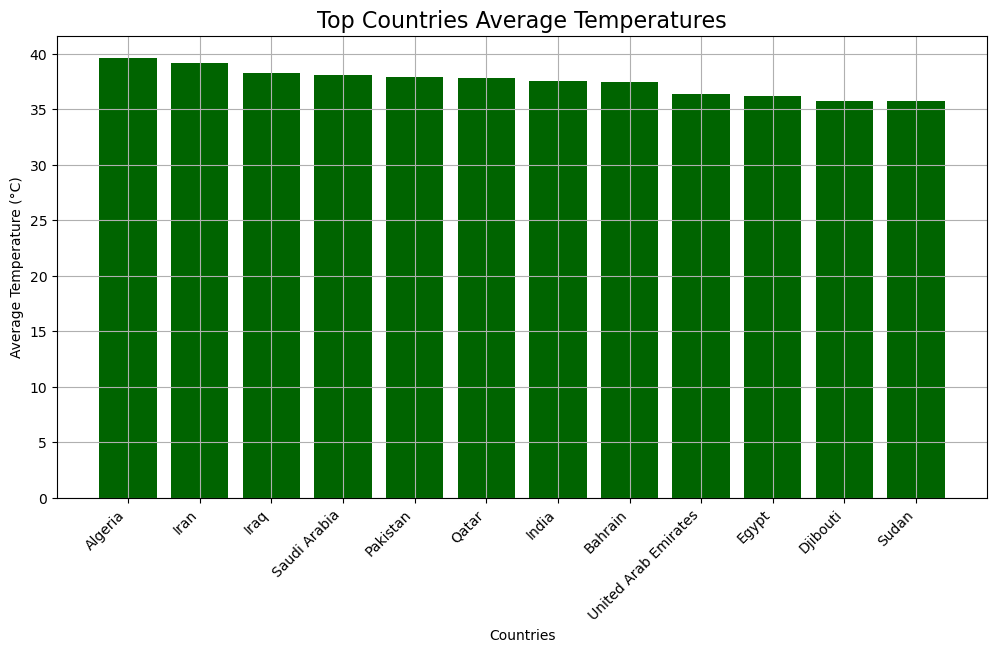

In [326]:
# Bar Chart.........

plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='darkgreen') 
plt.title("Top Countries Average Temperatures", fontsize=16)
plt.xlabel("Countries")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.show()


In [328]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

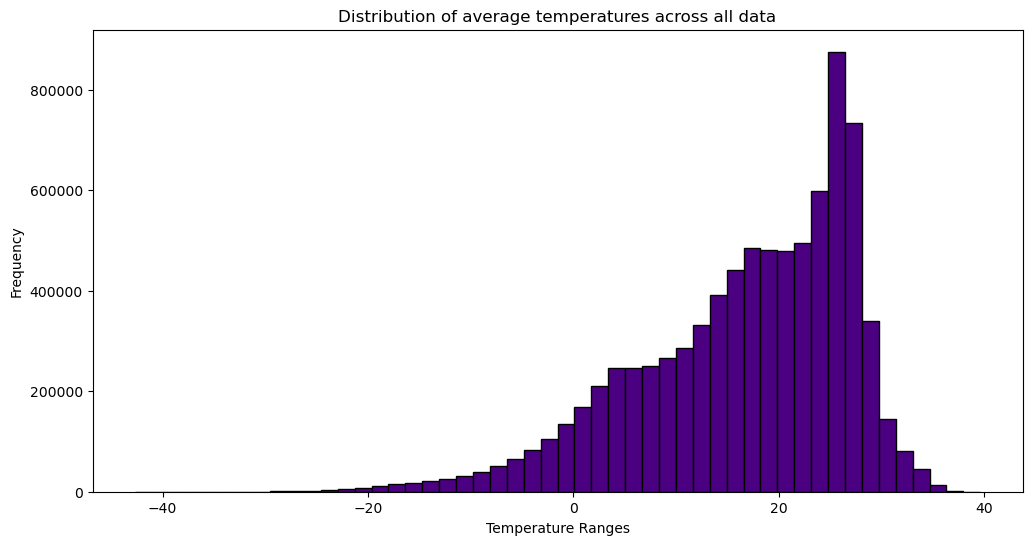

In [330]:
# Histogram Plot..............

plt.figure(figsize=(12, 6))
plt.hist(data['AverageTemperature'], bins=50, color='indigo', edgecolor='black')
plt.title('Distribution of average temperatures across all data')
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')
plt.show()

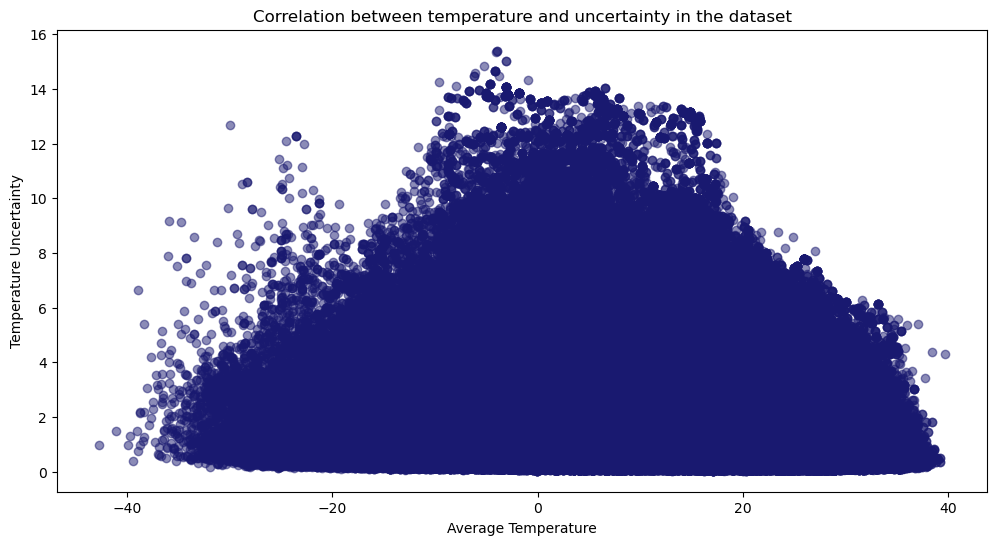

In [334]:
# Scatter Plot

data.dropna()
plt.figure(figsize=(12, 6))
plt.scatter(data['AverageTemperature'], data['AverageTemperatureUncertainty'], color='midnightblue',alpha=0.5)
plt.title('Correlation between temperature and uncertainty in the dataset')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.show()

In [337]:
#Box Plot.........

data.dropna()
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

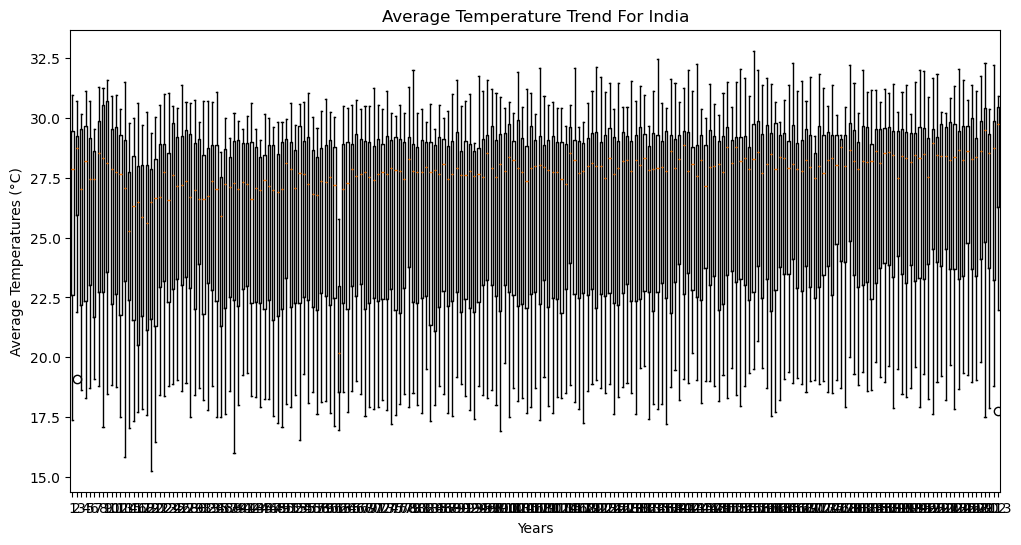

In [339]:
country_data = data[data['Country'] == 'India'].copy()
country_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
country_data = country_data.dropna(subset=['dt'])
country_data['Year'] = country_data['dt'].dt.year
grouped_data = [group['AverageTemperature'].values for _, group in country_data.groupby('Year')]

plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data, showfliers=True)
plt.title("Average Temperature Trend For India")
plt.xlabel("Years")
plt.ylabel("Average Temperatures (°C)")
plt.show()


# seaborn library......................

In [341]:
!pip install seaborn

In [343]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


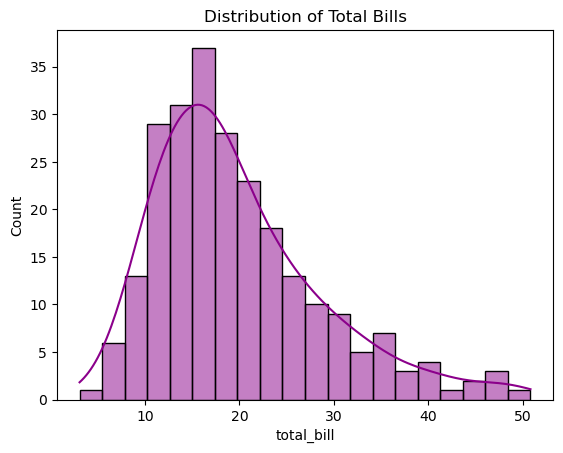

In [345]:
sns.histplot(data=tips, x="total_bill",bins=20,color='darkmagenta',kde=True)
plt.title("Distribution of Total Bills")
plt.show()       

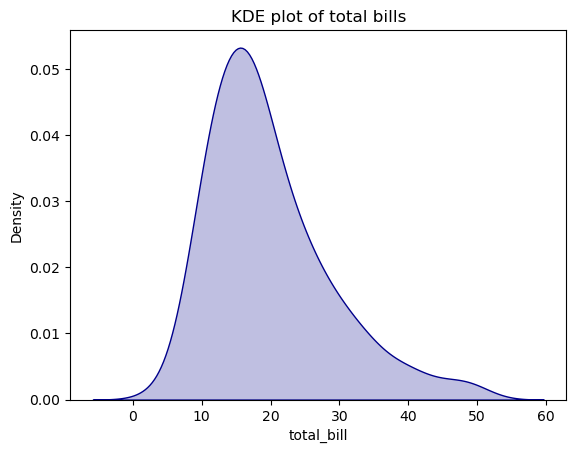

In [347]:
sns.kdeplot(data=tips, x='total_bill', fill=True, color='darkblue')
plt.title('KDE plot of total bills')
plt.show()

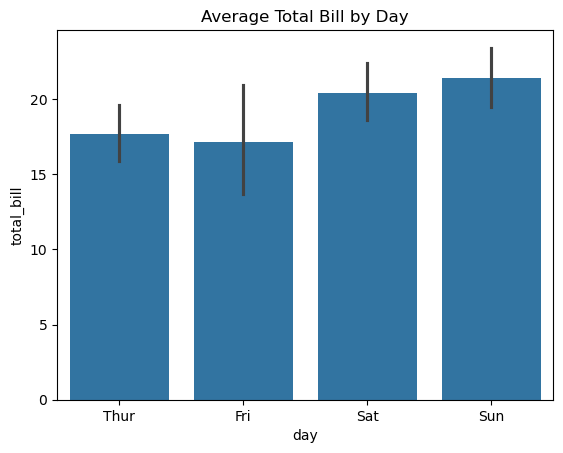

In [349]:
sns.barplot(data=tips, x="day", y="total_bill")
sns.color_palette("mako", as_cmap=True)
plt.title("Average Total Bill by Day")
plt.show()

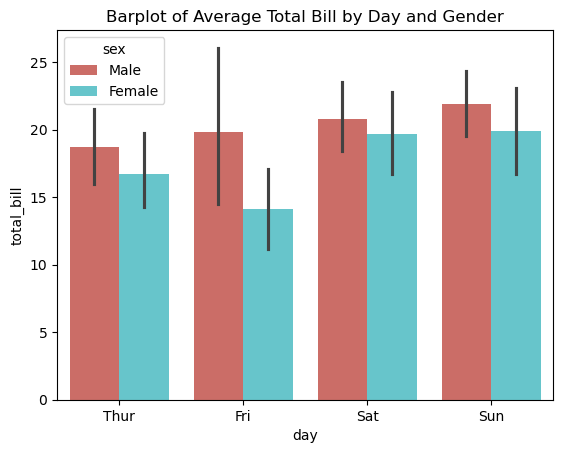

In [380]:
sns.barplot(data=tips, x="day", y="total_bill", hue='sex', palette='hls')
plt.title("Barplot of Average Total Bill by Day and Gender")
plt.show()

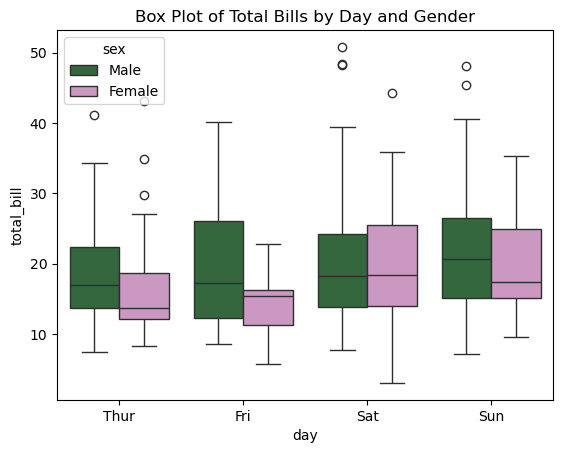

In [353]:
sns.boxplot(data=tips, x="day", y="total_bill", hue='sex',palette='cubehelix')
plt.title("Box Plot of Total Bills by Day and Gender")
plt.show()

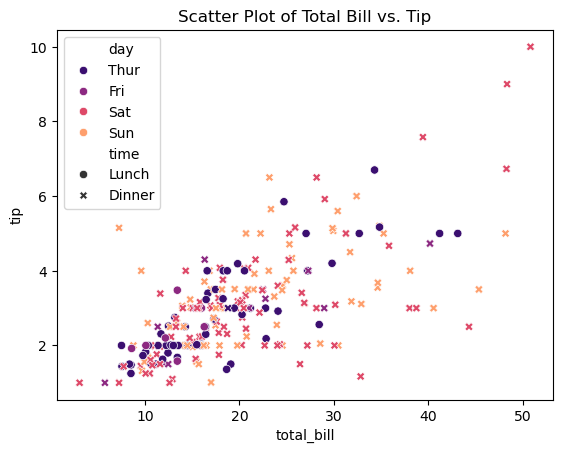

In [355]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='day', style="time", palette='magma')
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

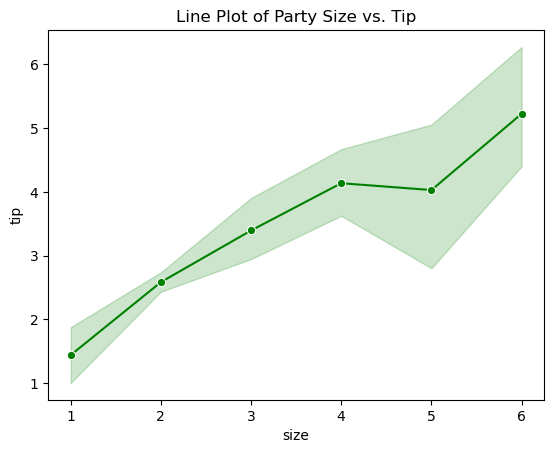

In [357]:
sns.lineplot(data=tips, x="size", y="tip", marker="o", color='green')
plt.title("Line Plot of Party Size vs. Tip")
plt.show()

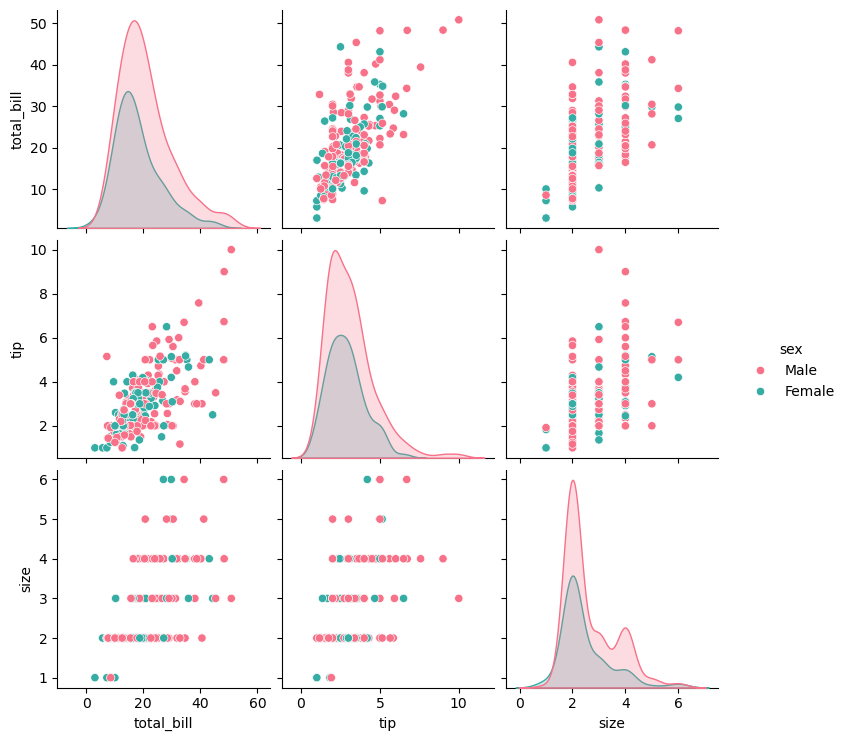

In [359]:
sns.pairplot(data=tips, hue="sex", palette="husl")
plt.show()

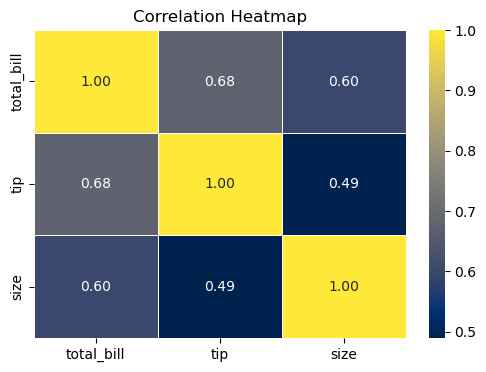

In [436]:
numeric_data = tips.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap="cividis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [366]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [370]:
tdf = pd.read_csv('train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Proxy1\AppData\Local\Temp\ipykernel_9324\4286448046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=tdf, errorbar=None, palette='flare')


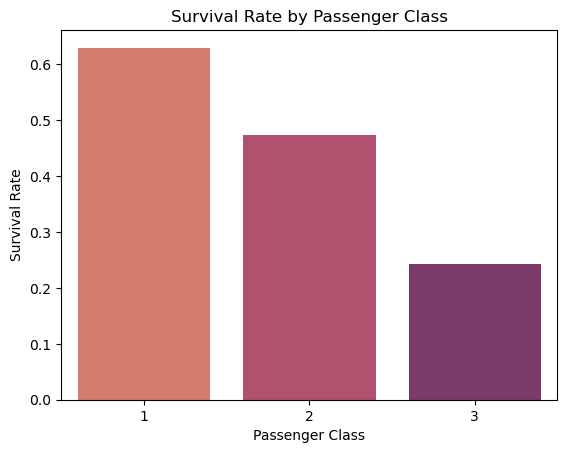

In [386]:
sns.barplot(x='Pclass', y='Survived', data=tdf, errorbar=None, palette='flare')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

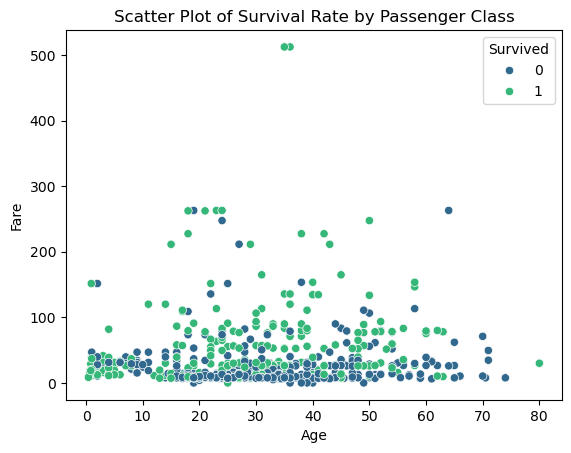

In [404]:
sns.scatterplot(x='Age', y='Fare', data=tdf, hue='Survived',palette='viridis')
plt.title('Scatter Plot of Survival Rate by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

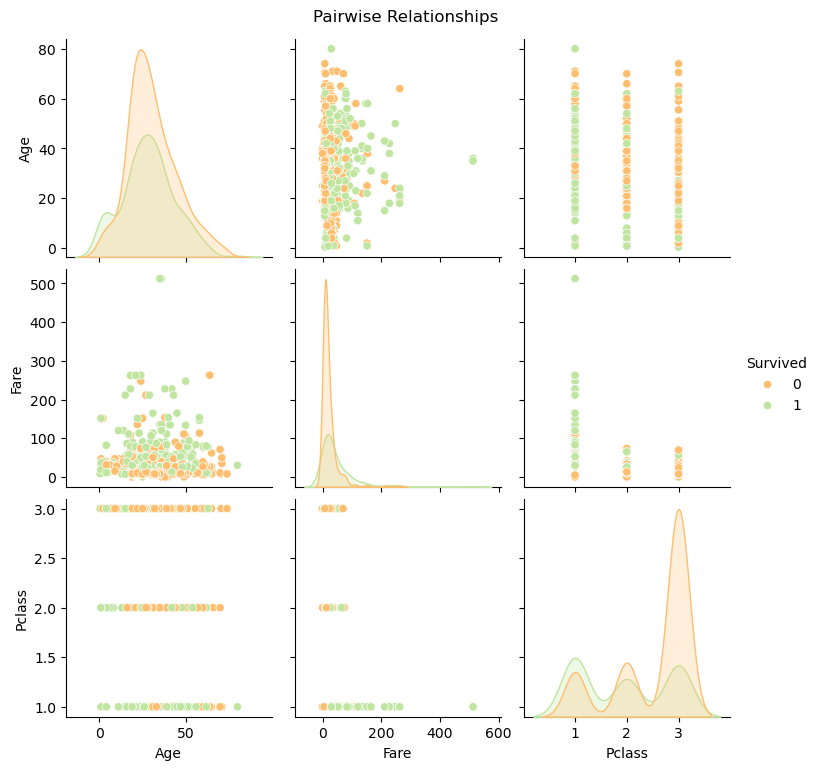

In [422]:
info=tdf[['Age','Fare','Pclass','Survived']]
sns.pairplot(info, hue='Survived',palette='Spectral',diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

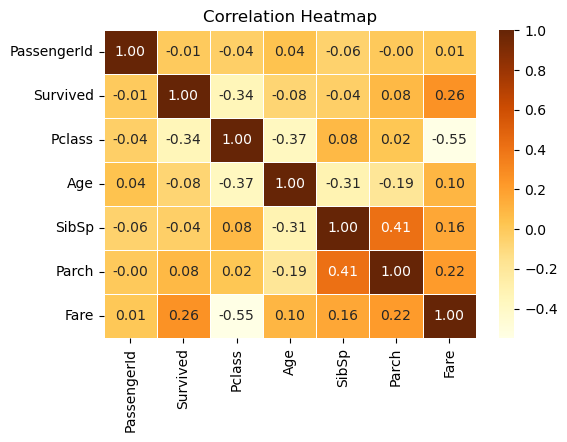

In [428]:
numeric_data = tdf.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()